# Getting more (o less) data
In an ideal world we would have the same number of observations for each variable, sampled at the same frequency, but as we saw on the last section this is not the case. Some variables may be sampled daily while other weekly, monthly or even irregularly. 

We could try  to fix this by either  
- Reducing the sampling frequency by mean of `resampling`
- Increase the sampling frequency by means of `interpolation`  


## Resampling
:::{card} Exercise 1
Read the documentation for  [`.resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).

Consider one of the temperature timeseries (eg. one of the temperature column in `Data/Time_series_Data.txt`), plot the original data (daily observations) with the data resampled at 3 days, 5 days, a week and a month.


 ```{admonition} Tips/Help
:class: tip, dropdown

Remember that `.resample()` just groups the data into bin and a  secondary method is needed to compute the resampled values, the simplest option is to use `resample().mean()`, but we can pass other potentially useful methods such as `.max()`,`std()`, `sum()`, etc.

```
:::

In [1]:
from funciones import*
import pandas as pd
import numpy as np 
import plotly.graph_objects as go
from importlib import reload

Data=pd.read_csv("../../Data/Time_series_DATA.txt",skiprows=149,index_col=0,sep='\t')
#file3=import_data_browser('https://raw.githubusercontent.com/iceclassic/mude/develop_1/data/Time_series_DATA.txt')
#Data=pd.read_csv(file3,skiprows=149,index_col=0,sep='\t')
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")


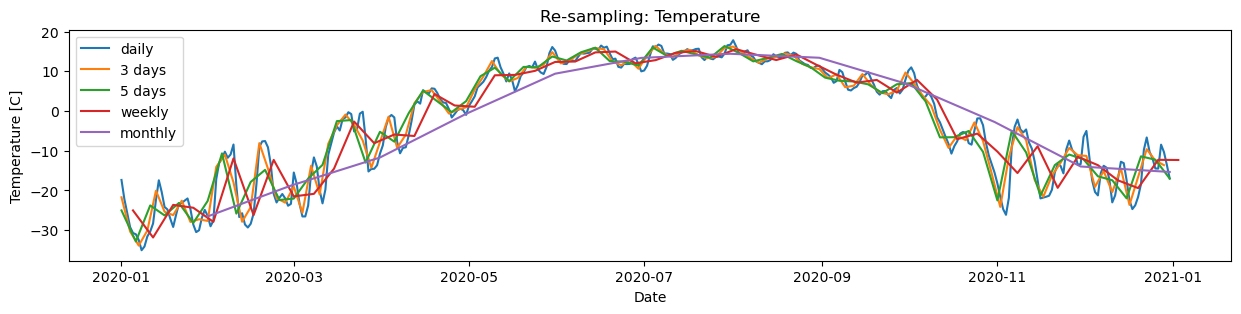

In [2]:
Temperature=Data['Regional: Air temperature [C]'] 
Temperature= Temperature[(Temperature.index.year >= 2020) & (Temperature.index.year < 2021)]
Temp_w3=Temperature.resample('3D').mean()
Temp_w5=Temperature.resample('5D').mean()
Temp_w7=Temperature.resample('W').mean()
Temp_w30=Temperature.resample('ME').mean()

fig, axs = plt.subplots(figsize=(15, 3))
plt.title('Re-sampling: Temperature')
plt.plot(Temperature, label='daily')
plt.plot(Temp_w3,label='3 days')
plt.plot(Temp_w5,label='5 days')
plt.plot(Temp_w7,label='weekly')
plt.plot(Temp_w30,label='monthly')
plt.ylabel("Temperature [C]")
plt.xlabel("Date")
plt.legend()
plt.show()


::: {card} Exercise 2
Down-sample the rainfall observations using the `.sum()` to every three and five days
:::

> compare this to declustering in EVA ??

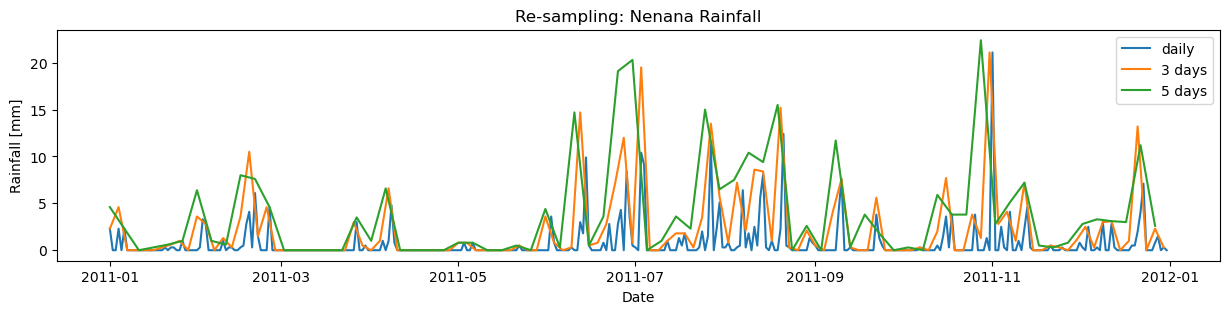

In [3]:
Rain=Data['Nenana: Rainfall [mm]']
         
Rain=Rain[(Rain.index.year >= 2011) & (Rain.index.year < 2012)]

Rain_d3=Rain.resample('3D').sum()
Rain_d5=Rain.resample('5D').sum()

fig, axs = plt.subplots(figsize=(15, 3))
plt.title('Re-sampling: Nenana Rainfall')
plt.plot(Rain, label='daily')
plt.plot(Rain_d3,label='3 days')
plt.plot(Rain_d5,label='5 days')
plt.ylabel("Rainfall [mm]")
plt.xlabel("Date")
plt.legend()
plt.show()

## Interpolating
Interpolation in dataframes works a little bit different than in other programming languages, for example in Matlab a *y_vector* , *x_vector* and a *target_x_vector* is needed such that by controlling the length/discretization of *target_x_vector* we can adjust the amount and location of the interpolated points. In dataframe, the location of the points is determined by the index of the original dataframe, so if we try to interpolate a column with daily observation, the result will be the same as the original series.

> add exercsie using re-indexing method()?

::: {card} Exercise 3

Use the method  [.`interpolate()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), to add daily observations to `Data['IceThickness [cm]']`, plot the results for linear, n-order polynomial and cubic-spline interpolation.
:::


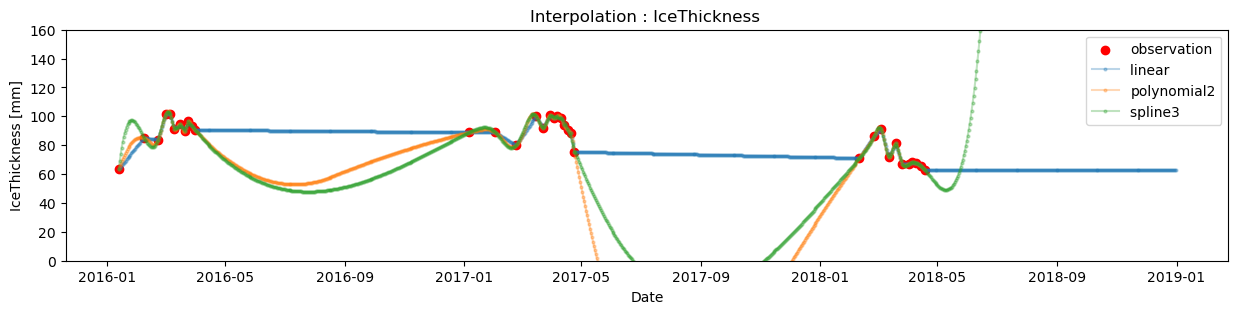

In [4]:
poly_order=2 # order of polynomic interpolation

Data.loc[Data['Days until break up'] == 0, 'IceThickness [cm'] = 0
Data=Data[(Data.index.year >= 2016) & (Data.index.year <=2018)]
ICE_linear=Data['IceThickness [cm]'].interpolate(method='linear')
ICE_poly=Data['IceThickness [cm]'].interpolate(method='polynomial',order=poly_order)
ICE_spline=Data['IceThickness [cm]'].interpolate(method='spline',order=3)
plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear.index,ICE_linear, label='linear ',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_poly, label=f'polynomial{poly_order}',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_spline.index,ICE_spline, label='spline3 ',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([0,160])
plt.xlabel("Date")
plt.legend()
plt.show()

If you used the ice thickness series as-it-is you encounter and obvious problem, the method ignores empty observations, causing weird values of ice thickness during the summer months.

::::{card} Ex 4 
We can say with confidence that the ice thickness just after break up is zero, then 

Use indexing to assign `IceThickness [cm]=0` at break up. (tip: remember that the break up date is encoded in `Days until break up`)


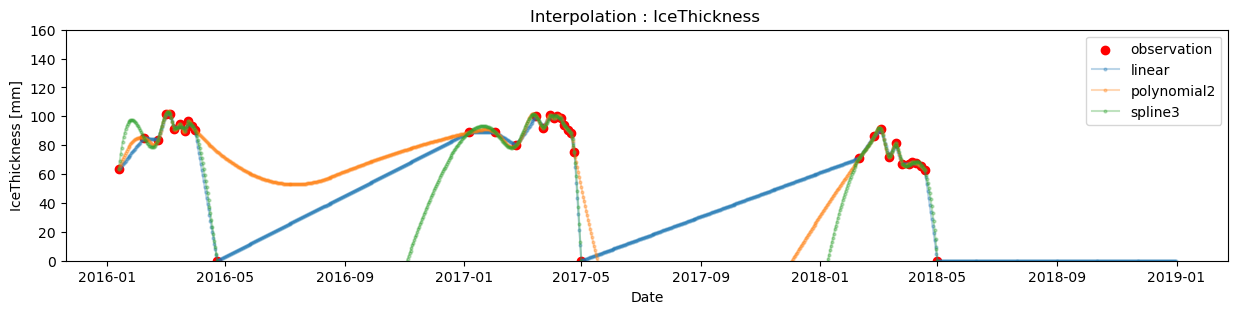

In [5]:

Data.loc[(Data['Days until break up']) == 0, 'IceThickness [cm]'] = 0
ICE_linear=Data['IceThickness [cm]'].interpolate(method='linear')
ICE_cubic=Data['IceThickness [cm]'].interpolate(method='polynomial',order=poly_order)
ICE_spline=Data['IceThickness [cm]'].interpolate(method='spline',order=3)
plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear, label='linear',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_poly, label=f'polynomial{poly_order}',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_spline, label='spline3',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([0,160])
plt.xlabel("Date")
plt.legend()
plt.show()

We are still assuming that the ice thickness is nonzero during the summer, 

:::{card} ex 6

Use the method [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) to replace the missing observations with a value of zero. 
:::

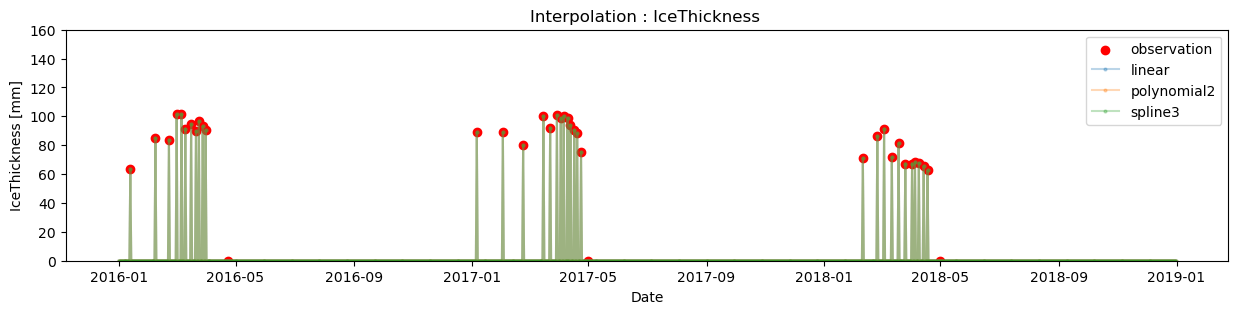

In [6]:
Data_0fill=Data.copy()
Data_0fill['IceThickness [cm]'] = Data_0fill['IceThickness [cm]'].fillna(0)
ICE_linear=Data_0fill['IceThickness [cm]'].interpolate(method='linear')
ICE_poly=Data_0fill['IceThickness [cm]'].interpolate(method='polynomial',order=poly_order)
ICE_spline=Data_0fill['IceThickness [cm]'].interpolate(method='spline',order=3)
plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear, label='linear',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_poly, label=f'polynomial{poly_order}',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_spline, label='spline3',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([0,160])
plt.xlabel("Date")
plt.legend()
plt.show()

Not quite right,if we fill every missing value with zero, we are also filling the values corresponding to winter, and these value are the values that we want to interpolate.

We could use (masks)[] to fill the missing values for the dates associates to summer ( eg. filling every missing value between the dates when the ice thickness is zero and non zero), but we can be pragmatic and arbitrary assume that ice start to form the 15 of october, the basis of this assumptions is that, in average, the temperature is below zero after the second week of october (in the next section we will refine this assumption)

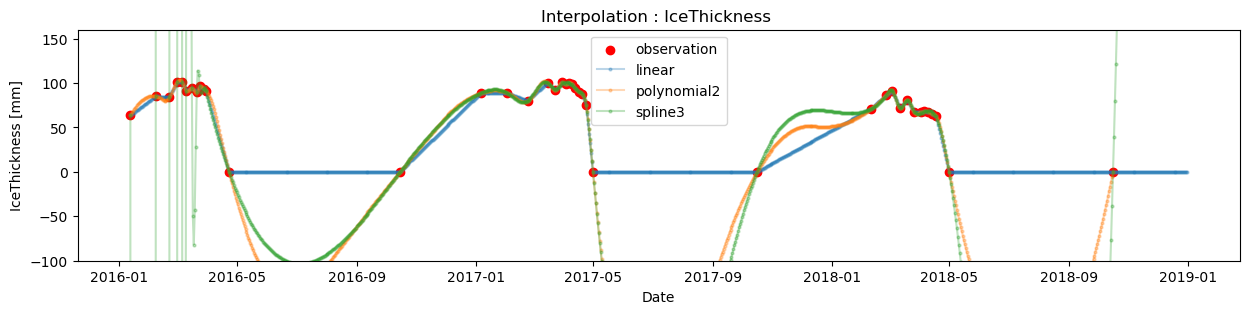

In [7]:
date = pd.Timestamp('2024-10-15') 
oct_1 = date.dayofyear # this varies if the years is leap or not, but for our purposes one day differnces is ok
Data.loc[(Data.index.dayofyear == oct_1), 'IceThickness [cm]'] = 0


ICE_linear=Data['IceThickness [cm]'].interpolate(method='linear')
ICE_poly=Data['IceThickness [cm]'].interpolate(method='polynomial',order=poly_order)
ICE_spline=Data['IceThickness [cm]'].interpolate(method='spline',order=3)
plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear, label='linear',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_poly, label=f'polynomial{poly_order}',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_spline, label='spline3',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([-100,160])
plt.xlabel("Date")
plt.legend()
plt.show()

The interpolation is still incorrect, it interpolates negatives values for ice thickness which not physically posible

::{card} ex7
Use indexing to change every instance of negative icethicknnes to zero.
:::

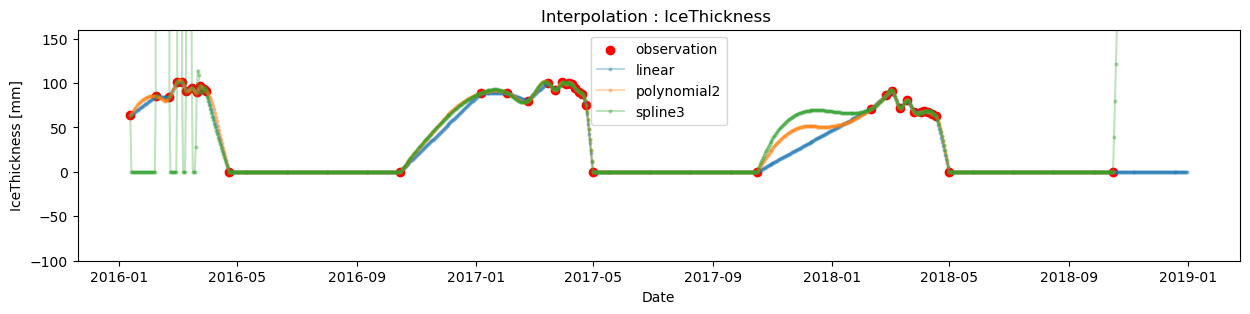

In [8]:
ICE_poly.loc[(ICE_poly <=0)] = 0
ICE_spline.loc[(ICE_spline <=0)] = 0
plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_linear, label='linear',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_poly, label=f'polynomial{poly_order}',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_spline, label='spline3',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([-100,160])
plt.xlabel("Date")
plt.legend()
plt.show()


As the figure above shows the cubic spline interpolation is susceptible to overshooting and, this cause by the constrain of the interpolation being two-times differentiable.  
> do i explained theory behind splines?

Fortunatelly there are alternatives/modification to spline interpoaltion called 'monotones splines' that fixes this problem, by beeing only one time differentiable.

Pandas `.interpolate()` use  [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate), and in pandas we can direclty use two monotones inteporlant: Piecewise Cubic Hermite Interpolating Polynomial (`pchip`) and AKIMA (`akima`). 


(https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html) 


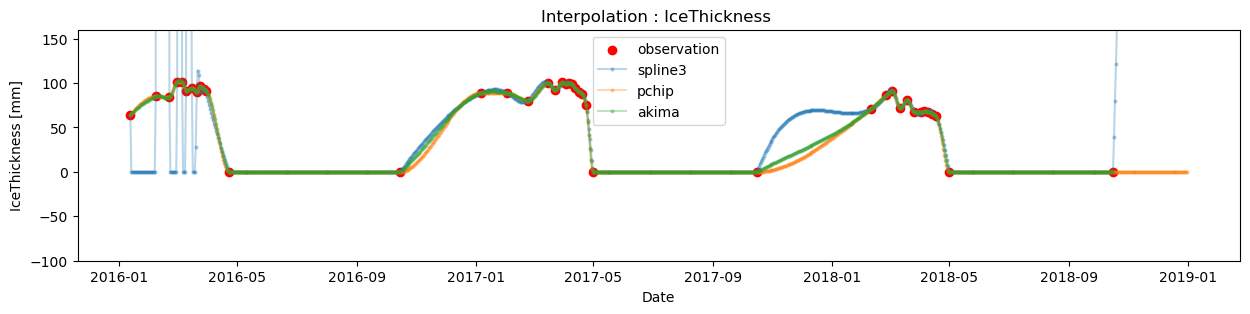

In [9]:
ICE_spline=Data['IceThickness [cm]'].interpolate(method='spline',order=3)
ICE_pchip=Data['IceThickness [cm]'].interpolate(method='pchip')
ICE_akima=Data['IceThickness [cm]'].interpolate(method='akima')


ICE_spline.loc[(ICE_spline <=0)] = 0
ICE_pchip.loc[(ICE_pchip <=0)] = 0
ICE_akima.loc[(ICE_akima <=0)] = 0

plt.figure(figsize=(15, 3))
plt.title('Interpolation : IceThickness ')
plt.scatter(Data.index,Data['IceThickness [cm]'], label='observation',color='r')
plt.plot(ICE_spline, label='spline3',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_pchip, label='pchip',marker='o',alpha=0.3,markersize=2)
plt.plot(ICE_akima, label='akima',marker='o',alpha=0.3,markersize=2)
plt.ylabel("IceThickness [mm]")
plt.ylim([-100,160])
plt.xlabel("Date")
plt.legend()
plt.show()

[Scipy](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html) has a great guide explaining the difference between the inteproaltion methods, higher order interpolations, and more advanced method etc. 